# Bibliotecas

In [483]:
import warnings
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import os
import argparse
import matplotlib
from random import randint   
import itertools
import pandas as pd
from geopy import distance
import time
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
warnings.filterwarnings("ignore")
import antenna_helper

# Dados Coletados

## Leitura do Dataframe

In [484]:
df_completo_LOS = pd.read_csv("../Dados_diversos_LOS.csv") # Dados de posição LOS
df_completo_NLOS = pd.read_csv("../Dados_diversos_NLOS.csv") # Dados de posição NLOS

df_ape_LOS = pd.read_csv("../Dados_diversos_LOS_ape.csv")
df_ape_NLOS = pd.read_csv("../Dados_diversos_NLOS_ape.csv")


In [485]:
df_completo_LOS = df_completo_LOS.assign(Visada=1)      # Adicionando coluna com Visada igual a 1
df_completo_NLOS = df_completo_NLOS.assign(Visada=0)    # Adicionando coluna com Visada igual a 0
GW_pos = [-21.77886349497853, -43.37347360887864]   # latitude/longitude do Gateway

df_final = pd.concat([df_completo_LOS, df_completo_NLOS])   # Concatenação

df_final = df_final.assign(Distância=0) # Coluna distância


df_ape_LOS = df_ape_LOS.assign(Visada=1)      # Adicionando coluna com Visada igual a 1
df_ape_NLOS = df_ape_NLOS.assign(Visada=0)    # Adicionando coluna com Visada igual a 0
GW_pos = [-21.77886349497853, -43.37347360887864]   # latitude/longitude do Gateway

df_final_ape = pd.concat([df_ape_LOS, df_ape_NLOS])   # Concatenação

df_final_ape = df_final_ape.assign(Distância=0) # Coluna distância

### Condições do Gateway

In [486]:
alt_ini = 936.1       # Altitude do  GW
alt_predio = 15   # Altura do prédio Itamar
comp_antena = 1.8     # Comprimento da antena
ganho_antena = 9      # Ganho da antena dBi

alt_ini = alt_ini + alt_predio + comp_antena

for index, row in df_final.iterrows():
  lat_final = row['Latitude']
  longi_final = row['Longitude']
  alt_final = row['Altitude']
  flat_distance = distance.distance((GW_pos[0], GW_pos[1]), (lat_final,longi_final)).meters
  euclidian_distance = math.sqrt(flat_distance**2 + (alt_final - alt_ini)**2)
  df_final.at[index,'Distância Horizontal'] = flat_distance
  df_final.at[index,'Distância'] = euclidian_distance

for index, row in df_final_ape.iterrows():
  lat_final = row['Latitude']
  longi_final = row['Longitude']
  alt_final = row['Altitude']
  flat_distance = distance.distance((GW_pos[0], GW_pos[1]), (lat_final,longi_final)).meters
  euclidian_distance = math.sqrt(flat_distance**2 + (alt_final - alt_ini)**2)
  df_final_ape.at[index,'Distância Horizontal'] = flat_distance
  df_final_ape.at[index,'Distância'] = euclidian_distance





In [487]:
# Modelo do Alvaro

col_antenna = antenna_helper.AntennaHelper(-0.97,-0.86, -0.71, -0.46, -0.22, -0.09, 0.00, -0.09,
 -0.22, -0.71, -1.87, -3.47, -4.20, -4.56, -4.95, -5.23, -5.53, -6.02, -6.58,-0.86, -0.71, -0.46, -0.22, -0.09, 0.00, -0.09,
 -0.22, -0.71, -1.87, -3.47, -4.20, -4.56, -4.95, -5.23, -5.53, -6.02, -6.58)

col_antenna.get_angles_gain()

Formatação -> ângulos (graus): atenuação (dB)
{-90: -6.02, -85: -5.53, -80: -5.23, -75: -4.95, -70: -4.56, -65: -4.2, -60: -3.47, -55: -1.87, -50: -0.71, -45: -0.22, -40: -0.09, -35: 0.0, -30: -0.09, -25: -0.22, -20: -0.46, -15: -0.71, -10: -0.86, -5: -0.97, 0: -6.58, 5: -0.86, 10: -0.71, 15: -0.46, 20: -0.22, 25: -0.09, 30: 0.0, 35: -0.09, 40: -0.22, 45: -0.71, 50: -1.87, 55: -3.47, 60: -4.2, 65: -4.56, 70: -4.95, 75: -5.23, 80: -5.53, 85: -6.02, 90: -6.58}


In [488]:
col_antenna = antenna_helper.AntennaHelper(
    -0.08, -0.36, -0.81, -0.99, -1.26, -1.35, -1.08,
    -0.45, -1.26, -1.44, -0.90, -1.71, -1.71, -1.98, -2.70,
    -2.97, -7.11, -9.00, -7.38, -4.14, -2.25, -1.13, -0.99,
    -0.63, -0.90, -0.99, -0.45, -1.44, -1.44, -0.90, -1.80,
    -2.52, -2.61, -2.25, -1.53, -1.17, -0.08)

col_antenna.get_angles_gain()


Formatação -> ângulos (graus): atenuação (dB)
{-90: -9.0, -85: -7.11, -80: -2.97, -75: -2.7, -70: -1.98, -65: -1.71, -60: -1.71, -55: -0.9, -50: -1.44, -45: -1.26, -40: -0.45, -35: -1.08, -30: -1.35, -25: -1.26, -20: -0.99, -15: -0.81, -10: -0.36, -5: -0.08, 0: -7.38, 5: -4.14, 10: -2.25, 15: -1.13, 20: -0.99, 25: -0.63, 30: -0.9, 35: -0.99, 40: -0.45, 45: -1.44, 50: -1.44, 55: -0.9, 60: -1.8, 65: -2.52, 70: -2.61, 75: -2.25, 80: -1.53, 85: -1.17, 90: -0.08}


In [489]:
df_final['Elevação'] = df_final.apply(lambda row: col_antenna.antenna_elevation(row['Distância Horizontal'], row['Altitude'], alt_ini), axis=1)
df_final['Atenuação Vertical'] = df_final.apply(lambda row: col_antenna.vertical_attenuation(row['Elevação']), axis=1)
df_final['Ganho Normalizado'] = df_final.apply(lambda row: (row['Atenuação Vertical'] + ganho_antena), axis=1)
df_final['Path Loss ED'] = df_final.apply(lambda row: (14 - row['ED RSSI'] + 5 - row['Ganho Normalizado']), axis=1)
df_final['Path Loss GW'] = df_final.apply(lambda row: (14 - row['GW RSSI'] + 5 - row['Ganho Normalizado']), axis=1)



# df_final['ED RSSI NG'] = df_final.apply(lambda row: antenna_gain(row['Elevacao'], ganho_antena, row['GW RSSI']), axis=1)

#14 - prx + 5 - Ganhonormalizado 


Ângulo de elevação: -8.67809284319393°
Ângulo de elevação: -8.077437286413431°
Ângulo de elevação: -7.7764926168594375°
Ângulo de elevação: -7.374432404204308°
Ângulo de elevação: -7.19852422924301°
Ângulo de elevação: -7.6034010290464°
Ângulo de elevação: -7.46371561449438°
Ângulo de elevação: -7.027646619989685°
Ângulo de elevação: -7.029772096890493°
Ângulo de elevação: -6.717541666912556°
Ângulo de elevação: -5.645760042841361°
Ângulo de elevação: -5.152453425727186°
Ângulo de elevação: -4.823119862856034°
Ângulo de elevação: -5.504309283209797°
Ângulo de elevação: -12.966077333596811°
Ângulo de elevação: -12.848798709234812°
Ângulo de elevação: -13.043556444308946°
Ângulo de elevação: -12.62913240876004°
Ângulo de elevação: -11.634108797474694°
Ângulo de elevação: -11.109016462880081°
Ângulo de elevação: -12.316630090472897°
Ângulo de elevação: -11.935281599342336°
Ângulo de elevação: -11.203161812119655°
Ângulo de elevação: -10.287891998295615°
Ângulo de elevação: -9.696761556580

In [490]:
df_final

,Time,GPS Time,id,Latitude,Longitude,Altitude,GPS Precision,# Satellites,ED RSSI,GW RSSI,Visada,Distância,Distância Horizontal,Elevação,Atenuação Vertical,Ganho Normalizado,Path Loss ED,Path Loss GW
0,18:44:32,21:44:24,33,-21.777797,-43.374139,918.7,1,14,-104,-88,1,229.112712,224.070959,-8.678093,-0.285973,8.714027,114.285973,98.285973
1,18:44:40,21:44:32,34,-21.778067,-43.374374,921.1,1,14,-101,-94,1,229.112712,224.070959,-8.077437,-0.252336,8.747664,111.252336,104.252336
2,18:45:13,21:45:04,38,-21.779387,-43.374631,922.3,1,14,-88,-89,1,229.110911,224.069118,-7.776493,-0.235484,8.764516,98.235484,99.235484
3,18:45:21,21:45:13,39,-21.779459,-43.374125,923.9,1,14,-98,-91,1,229.112208,224.070444,-7.374432,-0.212968,8.787032,108.212968,101.212968
4,18:45:29,21:45:21,40,-21.779385,-43.373685,924.6,1,14,-90,-91,1,229.105886,224.063980,-7.198524,-0.203117,8.796883,100.203117,101.203117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,16:53:39,19:53:31,471,-21.772752,-43.366115,895.7,1,13,-122,-125,0,1020.048544,1018.443515,-3.214591,-2.686698,6.313302,134.686698,137.686698
568,16:53:47,19:53:39,472,-21.772753,-43.366199,895.6,1,13,-121,-122,0,1013.462809,1011.841675,-3.241165,-2.647900,6.352100,133.647900,134.647900
569,16:53:55,19:53:47,473,-21.772771,-43.366277,895.8,1,13,-121,-122,0,1006.113135,1004.491528,-3.253459,-2.629950,6.370050,133.629950,134.629950
570,16:54:03,19:53:55,474,-21.772808,-43.366326,896.1,1,12,-122,-123,0,999.570394,997.955276,-3.257554,-2.623972,6.376028,134.623972,135.623972


In [491]:
df_visada_1 = df_final[df_final['Visada'] == 1]
df_visada_0 = df_final[df_final['Visada'] == 0]

df_visada_1_ape = df_final_ape[df_final_ape['Visada'] == 1]
df_visada_0_ape = df_final_ape[df_final_ape['Visada'] == 0]

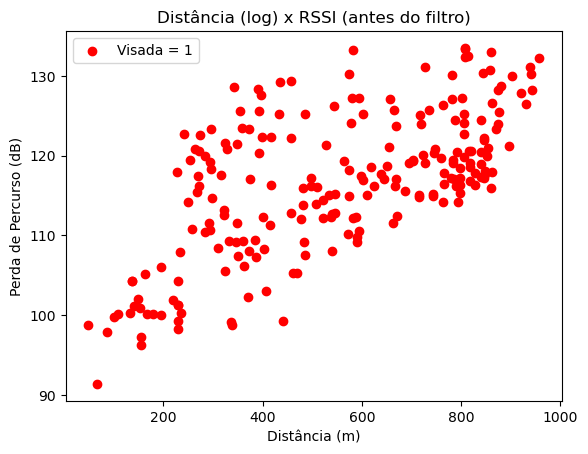

In [492]:
# plt.scatter((df_visada_1['Distância']), df_visada_1['Path Loss ED'], color='blue', label='Visada = 1')
plt.scatter((df_visada_1['Distância']), df_visada_1['Path Loss GW'], color='red', label='Visada = 1')

# plt.scatter((df_visada_0['Distância']), df_visada_0['Path Loss ED'], color='red', label='Visada = 0')
plt.legend()
plt.title("Distância (log) x RSSI (antes do filtro)")
# plt.xscale("log")
plt.xlabel("Distância (m)")
plt.ylabel("Perda de Percurso (dB)")
plt.show()

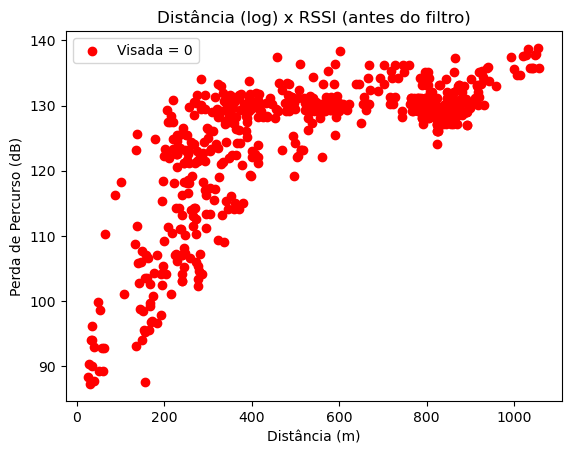

In [493]:
# plt.scatter((df_visada_0['Distância']), df_visada_0['Path Loss ED'], color='blue', label='Visada = 0')
plt.scatter((df_visada_0['Distância']), df_visada_0['Path Loss GW'], color='red', label='Visada = 0')

# plt.scatter((df_visada_0['Distância']), df_visada_0['Path Loss ED'], color='red', label='Visada = 0')
plt.legend()
plt.title("Distância (log) x RSSI (antes do filtro)")
# plt.xscale("log")
plt.xlabel("Distância (m)")
plt.ylabel("Perda de Percurso (dB)")
plt.show()

In [494]:
tamanho_janela = 32  # melhor até agora foi 17
tamanho_janela_2 = 15 #só para LOS

df_visada_1 = df_final[df_final['Visada'] == 1]
df_visada_0 = df_final[df_final['Visada'] == 0]

df_visada_0 = df_visada_0.sort_values(by=['Distância'],ascending=True)
# df_visada_1 = df_visada_1.sort_values(by=['Distância'])

df_visada_1 = df_visada_1.sort_values(by=['Distância'], ascending=True)
# df_visada_1 = df_visada_1.sort_values(by=['Path Loss GW'], ascending=False)
df_visada_1['Path Loss GW Média Móvel'] = df_visada_1['Path Loss GW'].rolling(window=tamanho_janela_2).mean()
df_visada_1 = df_visada_1.dropna(how='any') # para desconsiderar a primeira janela

df_visada_0['Path Loss GW Média Móvel'] = df_visada_0['Path Loss GW'].rolling(window=tamanho_janela).mean()
df_visada_0 = df_visada_0.dropna(how='any') # para desconsiderar a primeira janela
# df_visada_0 = df_visada_0['ED RSSI NG Média Móvel'].fillna(df_visada_0['ED RSSI NG'], inplace=True) # para conservar os valores iniciais da primeira janela


In [495]:
df_visada_1

,Time,GPS Time,id,Latitude,Longitude,Altitude,GPS Precision,# Satellites,ED RSSI,GW RSSI,Visada,Distância,Distância Horizontal,Elevação,Atenuação Vertical,Ganho Normalizado,Path Loss ED,Path Loss GW,Path Loss GW Média Móvel
45,19:37:41,22:37:33,426,-21.772062,-43.367976,887.6,1,11,-91,-89,1,166.498174,162.581770,-21.882568,-1.091659,7.908341,102.091659,100.091659,99.954315
54,19:38:54,22:38:46,435,-21.773626,-43.365677,885.8,1,11,-92,-89,1,178.443970,168.993966,-21.655829,-1.079415,7.920585,103.079415,100.079415,100.045610
30,19:02:07,22:01:59,163,-21.773613,-43.365668,885.7,1,11,-106,-95,1,194.154083,190.954963,-19.387758,-0.967959,8.032041,116.967959,105.967959,101.019027
44,19:37:33,22:37:25,425,-21.772451,-43.368249,877.9,1,11,-99,-89,1,195.949103,192.779773,-21.258273,-1.057947,7.942053,110.057947,100.057947,101.164816
55,19:39:02,22:38:54,436,-21.773623,-43.365679,885.8,1,11,-94,-91,1,218.632124,210.351719,-17.692139,-0.906917,8.093083,104.906917,101.906917,101.311026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,16:05:55,19:05:47,118,-21.777852,-43.371950,931.8,1,15,-107,-111,1,930.899263,925.831755,-1.305563,-5.473878,3.526122,122.473878,126.473878,125.368282
206,16:58:39,19:58:31,508,-21.774132,-43.366016,894.0,1,14,-108,-119,1,939.259375,936.323947,-3.599481,-2.124757,6.875243,120.124757,131.124757,126.045196
208,16:58:56,19:58:47,510,-21.774028,-43.366099,894.4,1,14,-117,-118,1,940.653765,937.832429,-3.569365,-2.168728,6.831272,129.168728,130.168728,126.008249
209,16:59:04,19:58:55,511,-21.773977,-43.366156,894.3,1,14,-116,-116,1,942.422467,939.512696,-3.569072,-2.169154,6.830846,128.169154,128.169154,125.689644


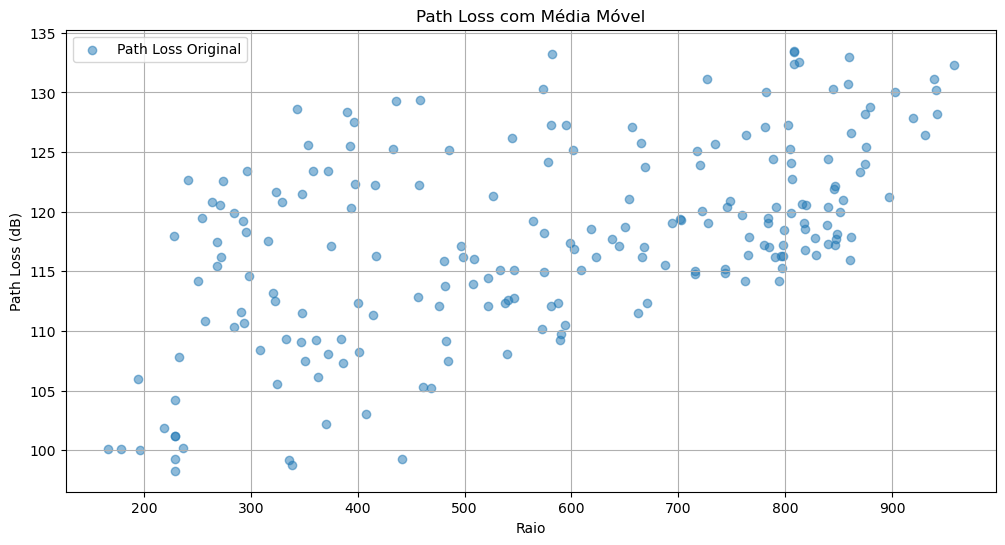

In [496]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(df_visada_1['Distância'], df_visada_1['Path Loss GW'],  label='Path Loss Original', alpha=0.5)
# plt.scatter(df_visada_1['Distância'], -df_visada_1['GW RSSI'],  label='GW RSSI', alpha=0.7)

# plt.scatter(df_visada_1['Distância'], df_visada_1['Path Loss GW Média Móvel'], label='Média Móvel', linewidth=2)
plt.xlabel('Raio')
plt.ylabel('Path Loss (dB)')
plt.title('Path Loss com Média Móvel')
plt.legend()
plt.grid(True)
plt.show()


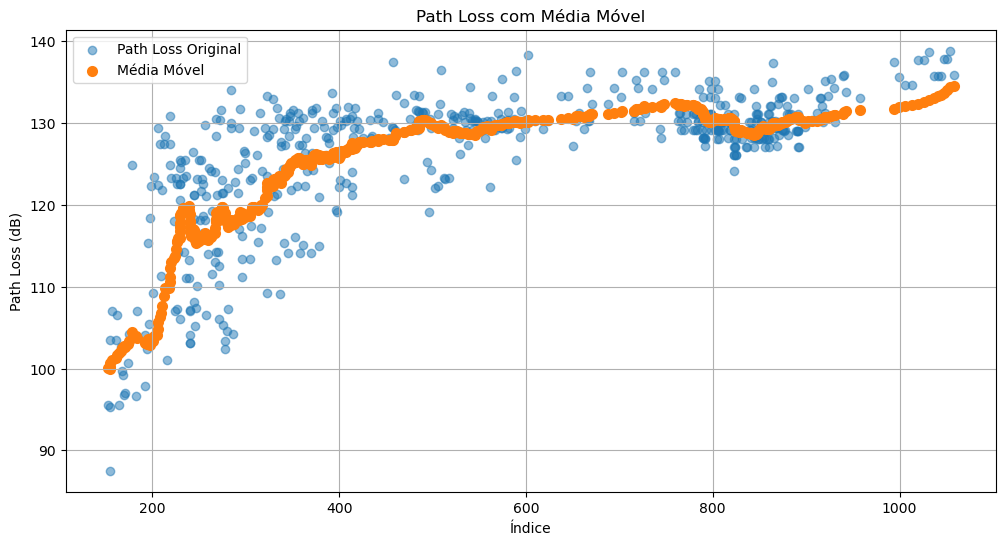

In [497]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(df_visada_0['Distância'], df_visada_0['Path Loss GW'],  label='Path Loss Original', alpha=0.5)
plt.scatter(df_visada_0['Distância'], df_visada_0['Path Loss GW Média Móvel'], label='Média Móvel', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Path Loss (dB)')
plt.title('Path Loss com Média Móvel')
plt.legend()
plt.grid(True)
plt.show()


In [498]:
df_visada_1

,Time,GPS Time,id,Latitude,Longitude,Altitude,GPS Precision,# Satellites,ED RSSI,GW RSSI,Visada,Distância,Distância Horizontal,Elevação,Atenuação Vertical,Ganho Normalizado,Path Loss ED,Path Loss GW,Path Loss GW Média Móvel
45,19:37:41,22:37:33,426,-21.772062,-43.367976,887.6,1,11,-91,-89,1,166.498174,162.581770,-21.882568,-1.091659,7.908341,102.091659,100.091659,99.954315
54,19:38:54,22:38:46,435,-21.773626,-43.365677,885.8,1,11,-92,-89,1,178.443970,168.993966,-21.655829,-1.079415,7.920585,103.079415,100.079415,100.045610
30,19:02:07,22:01:59,163,-21.773613,-43.365668,885.7,1,11,-106,-95,1,194.154083,190.954963,-19.387758,-0.967959,8.032041,116.967959,105.967959,101.019027
44,19:37:33,22:37:25,425,-21.772451,-43.368249,877.9,1,11,-99,-89,1,195.949103,192.779773,-21.258273,-1.057947,7.942053,110.057947,100.057947,101.164816
55,19:39:02,22:38:54,436,-21.773623,-43.365679,885.8,1,11,-94,-91,1,218.632124,210.351719,-17.692139,-0.906917,8.093083,104.906917,101.906917,101.311026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,16:05:55,19:05:47,118,-21.777852,-43.371950,931.8,1,15,-107,-111,1,930.899263,925.831755,-1.305563,-5.473878,3.526122,122.473878,126.473878,125.368282
206,16:58:39,19:58:31,508,-21.774132,-43.366016,894.0,1,14,-108,-119,1,939.259375,936.323947,-3.599481,-2.124757,6.875243,120.124757,131.124757,126.045196
208,16:58:56,19:58:47,510,-21.774028,-43.366099,894.4,1,14,-117,-118,1,940.653765,937.832429,-3.569365,-2.168728,6.831272,129.168728,130.168728,126.008249
209,16:59:04,19:58:55,511,-21.773977,-43.366156,894.3,1,14,-116,-116,1,942.422467,939.512696,-3.569072,-2.169154,6.830846,128.169154,128.169154,125.689644


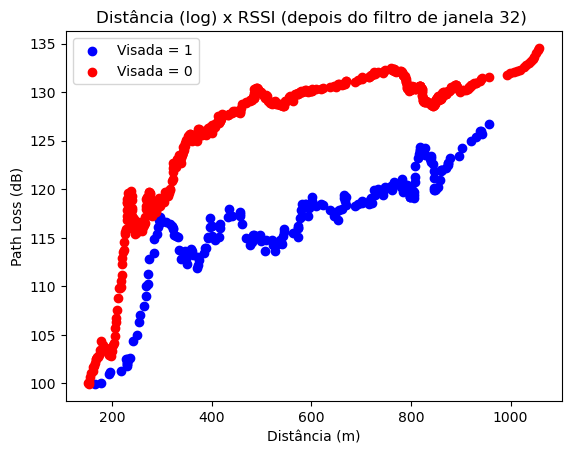

In [499]:
plt.scatter((df_visada_1['Distância']), df_visada_1['Path Loss GW Média Móvel'], color='blue', label='Visada = 1')
plt.scatter((df_visada_0['Distância']), df_visada_0['Path Loss GW Média Móvel'], color='red', label='Visada = 0')
# plt.scatter((df_visada_1['Distância']), df_visada_1['ED RSSI NG Média Móvel'], color='blue', label='Visada = 1')
# plt.scatter((df_visada_0['Distância']), df_visada_0['ED RSSI NG Média Móvel'], color='red', label='Visada = 0')

plt.legend()
plt.title(f"Distância (log) x RSSI (depois do filtro de janela {tamanho_janela}) ")
# plt.xscale("log")
# plt.xlim(0,780)
# plt.xlim(0,350)
# plt.xlim(350,780)
# plt.xlim(0,3)


plt.xlabel("Distância (m)")
plt.ylabel("Path Loss (dB)")
plt.show()

In [500]:
from sklearn.metrics import mean_squared_error


df_visada_1 = df_visada_1.sort_values(by=['Distância'])

LOS_distance_scaler = MinMaxScaler()
LOS_distance = (np.log10(df_visada_1['Distância'].values.astype(float))).reshape(-1, 1)
print(len(LOS_distance))
LOS_distance_normalizado = LOS_distance_scaler.fit_transform(LOS_distance)

LOS_RSSI_scaler = MinMaxScaler()
LOS_RSSI = (df_visada_1['Path Loss GW Média Móvel'].values.astype(float)).reshape(-1, 1)
LOS_RSSI_normalizado = LOS_RSSI_scaler.fit_transform(LOS_RSSI)


x_LOS = LOS_distance_normalizado
y_LOS = LOS_RSSI_normalizado

x_LOS = LOS_distance
y_LOS = LOS_RSSI
modeloLOS = LinearRegression().fit(x_LOS, y_LOS)
reg_ed_rssi_LOS = modeloLOS.predict(x_LOS)

print(f"Score: {modeloLOS.score(x_LOS, y_LOS)}, \na: {modeloLOS.coef_[0][0]},\nb: {modeloLOS.intercept_[0]}")


rmse = np.sqrt(mean_squared_error(y_LOS, reg_ed_rssi_LOS))
print(f"n: {(modeloLOS.coef_[0][0]/10):.2f}, RMSE: {rmse:.2f}")

#2.47

208
Score: 0.8041388096153921, 
a: 25.65880740335969,
b: 46.85036115314318
n: 2.57, RMSE: 2.42


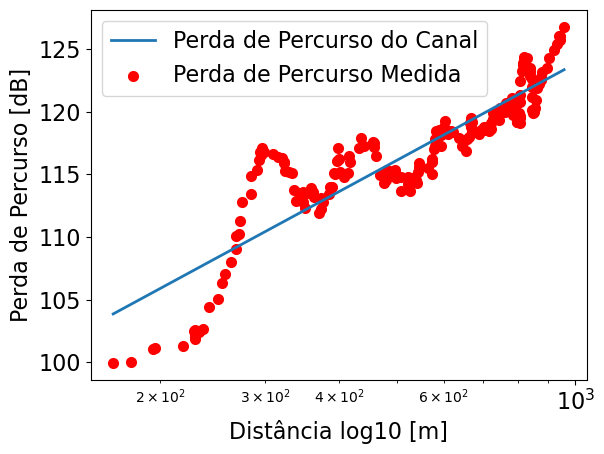

In [501]:
# plt.figure(figsize=(10, 6))


plt.plot((df_visada_1['Distância']),(reg_ed_rssi_LOS) , label='Perda de Percurso do Canal',linewidth=2)

plt.scatter((df_visada_1['Distância']), y_LOS, c = 'red', label='Perda de Percurso Medida',linewidth=2)

plt.legend(fontsize=16)
plt.xlabel('Distância log10 [m]', fontsize=16)
plt.ylabel('Perda de Percurso [dB]', fontsize=16)
plt.xscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f"perdapercursoLOS",dpi=800,bbox_inches='tight')
plt.show()

In [502]:
df_visada_0

,Time,GPS Time,id,Latitude,Longitude,Altitude,GPS Precision,# Satellites,ED RSSI,GW RSSI,Visada,Distância,Distância Horizontal,Elevação,Atenuação Vertical,Ganho Normalizado,Path Loss ED,Path Loss GW,Path Loss GW Média Móvel
48,18:48:11,21:48:03,60,-21.779052,-43.374903,920.6,1,12,-90,-85,0,152.705365,149.250254,-12.211351,-0.559022,8.440978,100.559022,95.559022,100.007993
34,18:45:04,21:44:56,37,-21.779074,-43.374920,921.8,1,14,-88,-77,0,154.562585,151.401396,-11.607900,-0.504711,8.495289,98.504711,87.504711,99.981921
260,15:53:20,18:53:12,25,-21.777526,-43.373881,939.8,1,15,-89,-85,0,154.564377,154.008236,-4.861898,-0.281629,8.718371,99.281629,95.281629,100.138088
33,18:44:56,21:44:48,36,-21.778664,-43.374927,922.6,1,14,-80,-93,0,154.887022,151.894370,-11.281322,-0.475319,8.524681,90.475319,103.475319,100.644590
268,15:55:22,18:55:14,40,-21.778753,-43.374983,942.8,1,15,-97,-95,0,156.918062,156.592682,-3.690383,-1.992041,7.007959,108.992041,106.992041,101.049650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,16:52:59,19:52:50,466,-21.772837,-43.365728,895.4,1,13,-122,-123,0,1044.205124,1042.620780,-3.156635,-2.771313,6.228687,134.771313,135.771313,133.405644
561,16:52:50,19:52:42,465,-21.772870,-43.365656,895.9,1,13,-123,-125,0,1047.580319,1046.028453,-3.119067,-2.826162,6.173838,135.826162,137.826162,133.678589
560,16:52:42,19:52:34,464,-21.772909,-43.365580,896.5,1,13,-123,-125,0,1050.883031,1049.368469,-3.076494,-2.888319,6.111681,135.888319,137.888319,134.016137
559,16:52:34,19:52:26,463,-21.772943,-43.365508,895.9,1,13,-125,-126,0,1054.427070,1052.885296,-3.098794,-2.855761,6.144239,137.855761,138.855761,134.383875


In [503]:
from sklearn.metrics import mean_squared_error

df_visada_0 = df_visada_0.sort_values(by=['Distância'])

LOS_distance_scaler = MinMaxScaler()
LOS_distance = (np.log10(df_visada_0['Distância'].values.astype(float))).reshape(-1, 1)
print(len(LOS_distance))
LOS_distance_normalizado = LOS_distance_scaler.fit_transform(LOS_distance)

LOS_RSSI_scaler = MinMaxScaler()
LOS_RSSI = (df_visada_0['Path Loss GW Média Móvel'].values.astype(float)).reshape(-1, 1)
LOS_RSSI_normalizado = LOS_RSSI_scaler.fit_transform(LOS_RSSI)

x_LOS = LOS_distance_normalizado
y_LOS = LOS_RSSI_normalizado
x_LOS = (np.log10(df_visada_0['Distância'].values.astype(float))).reshape(-1, 1)
y_LOS = (df_visada_0['Path Loss GW Média Móvel'].values.astype(float)).reshape(-1, 1)


modeloLOS = LinearRegression().fit(x_LOS, y_LOS)
reg_ed_rssi_LOS = modeloLOS.predict(x_LOS)

print(f"Score: {modeloLOS.score(x_LOS, y_LOS)}, \na: {modeloLOS.coef_[0][0]},\nb: {modeloLOS.intercept_[0]},")


rmse = np.sqrt(mean_squared_error(y_LOS, reg_ed_rssi_LOS))
print(f"n: {(modeloLOS.coef_[0][0]/10):.2f}, RMSE: {rmse:.2f}")


541
Score: 0.794908922102748, 
a: 30.213407509321154,
b: 44.01054631933843,
n: 3.02, RMSE: 3.49


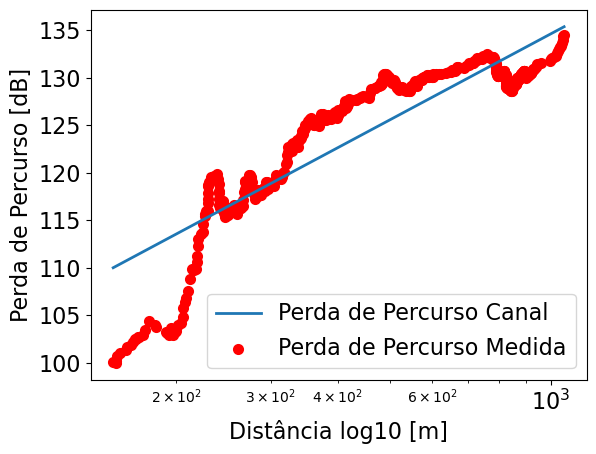

In [504]:
# plt.figure(figsize=(10, 6))


plt.plot((df_visada_0['Distância']),(reg_ed_rssi_LOS) , label='Perda de Percurso Canal',linewidth=2)

plt.scatter((df_visada_0['Distância']), y_LOS, c = 'red', label='Perda de Percurso Medida',linewidth=2)

plt.legend(fontsize=16)
plt.xlabel('Distância log10 [m]', fontsize=16)
plt.ylabel('Perda de Percurso [dB]', fontsize=16)
plt.xscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f"perdapercurso_NLOS",dpi=800,bbox_inches='tight')


plt.show()


In [505]:
df_visada_1

,Time,GPS Time,id,Latitude,Longitude,Altitude,GPS Precision,# Satellites,ED RSSI,GW RSSI,Visada,Distância,Distância Horizontal,Elevação,Atenuação Vertical,Ganho Normalizado,Path Loss ED,Path Loss GW,Path Loss GW Média Móvel
45,19:37:41,22:37:33,426,-21.772062,-43.367976,887.6,1,11,-91,-89,1,166.498174,162.581770,-21.882568,-1.091659,7.908341,102.091659,100.091659,99.954315
54,19:38:54,22:38:46,435,-21.773626,-43.365677,885.8,1,11,-92,-89,1,178.443970,168.993966,-21.655829,-1.079415,7.920585,103.079415,100.079415,100.045610
30,19:02:07,22:01:59,163,-21.773613,-43.365668,885.7,1,11,-106,-95,1,194.154083,190.954963,-19.387758,-0.967959,8.032041,116.967959,105.967959,101.019027
44,19:37:33,22:37:25,425,-21.772451,-43.368249,877.9,1,11,-99,-89,1,195.949103,192.779773,-21.258273,-1.057947,7.942053,110.057947,100.057947,101.164816
55,19:39:02,22:38:54,436,-21.773623,-43.365679,885.8,1,11,-94,-91,1,218.632124,210.351719,-17.692139,-0.906917,8.093083,104.906917,101.906917,101.311026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,16:05:55,19:05:47,118,-21.777852,-43.371950,931.8,1,15,-107,-111,1,930.899263,925.831755,-1.305563,-5.473878,3.526122,122.473878,126.473878,125.368282
206,16:58:39,19:58:31,508,-21.774132,-43.366016,894.0,1,14,-108,-119,1,939.259375,936.323947,-3.599481,-2.124757,6.875243,120.124757,131.124757,126.045196
208,16:58:56,19:58:47,510,-21.774028,-43.366099,894.4,1,14,-117,-118,1,940.653765,937.832429,-3.569365,-2.168728,6.831272,129.168728,130.168728,126.008249
209,16:59:04,19:58:55,511,-21.773977,-43.366156,894.3,1,14,-116,-116,1,942.422467,939.512696,-3.569072,-2.169154,6.830846,128.169154,128.169154,125.689644
